# Introduction to Image Classification
© Explore Data Science Academy

## Instructions to Students
- **Do not add or remove cells in this notebook. Do not edit or remove the `### START FUNCTION` or `### END FUNCTION` comments. Do not add any code outside of the functions you are required to edit. Doing any of this will lead to a mark of 0%!**
- Answer the questions according to the specifications provided.
- Use the given cell in each question to to see if your function matches the expected outputs.
- Do not hard-code answers to the questions.
- The use of stackoverflow, google, and other online tools are permitted. However, copying fellow student's code is not permissible and is considered a breach of the Honour code below. Doing this will result in a mark of 0%.
- Good luck, and may the force be with you!

## Honour Code
I **Roger Arendse**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).  

Non-compliance with the honour code constitutes a material breach of contract.

## Overview

The versatile Machine Learning techniques you have been learning will enable you to process complex and different data at a faster pace. Luckily for us, this is exactly what we're being tested on. So far you have performed classification on both tabular [the iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) and textual data [the mbti dataset](https://www.kaggle.com/datasnaek/mbti-type). In this test you will apply the machine learning techniques you have learned for image classification. 

## Imports

Let's go ahead and load our libraries 

In [1]:
import numpy as np
import gzip # This is used in extracting the images

import matplotlib.pyplot as plt # In order to plot the images to see what we are dealing with
from sklearn.ensemble import RandomForestClassifier # You'll be using Random Forest to classify the images
from sklearn.metrics import accuracy_score # Sklearn's way of measuring accuracy
from sklearn.metrics import classification_report 

## The Dataset
The dataset we will be using is called MNIST. This is a large collection of handdrawn digits 0-9 and is a good dataset to learn image classification on as it requires little to no preprocessing.

The dataset can be downloaded from [The MNIST Database](http://yann.lecun.com/exdb/mnist/). Download all four files. These files are the images and their respective labels and the dataset has already been split into a train and a test set.

Once you've downloaded the data, make sure that the data is in the same folder as this Jupyter Notebook. If you've managed to do all that, we can now begin! 

By default, the MNIST files are compressed in the gzip format. The following two functions will extract the data for you. ** **Don't change this code.** **

In [2]:
def extract_data(filename, num_images, IMAGE_WIDTH):
    """Extract the images into a 4D tensor [image index, y, x, channels]."""
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_WIDTH * IMAGE_WIDTH * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_WIDTH*IMAGE_WIDTH)
        return data

def extract_labels(filename, num_images):
    """Extract the labels into a vector of int64 label IDs."""
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

## Question 1 - Extracting the data

The MNIST dataset consists for 60 000 training images and 10 000 testing images. This is a lot of data! Let's not extract all of that right now. Create a function `get_data` that uses the above functions to extract a certain number of images and their labels from the gzip files.

The function will take as input two integer values and return four variables in the form of `(X_train, y_train), (X_test, y_test)`, where `(X_train, y_train)` are the extracted images / labels of the training set, and `(X-test, y_test)` are the extracted images / labels of the testing set.

Image pixel values range from 0-255. Normalise the image pixels so that they are in the range 0-1.

_**Function Specifications:**_
* Should take two integers as input, one representing the number of training images, and the other the number of testing images.
* Should return two `tuples` of the form `(X_train, y_train), (X_test, y_test)`.

_**Note**_ that the size of the MNIST images are 28x28

Usually when setting up your dataset, it is a good idea to randomly shuffle your data in case your data is ordered. Think of this as shuffling a pack of cards. Here, however, we aren't going to shuffle the data so that all our answers are the same.

In [3]:
### START FUNCTION
def get_data(num_train_images,num_test_images):
    #your code here

    # use functions to extract images and labels
    # training data
    X_train = extract_data('train-images-idx3-ubyte.gz', num_train_images, 28) / 255
    y_train = extract_labels('train-labels-idx1-ubyte.gz', num_train_images)

    # testing data 
    X_test = extract_data('t10k-images-idx3-ubyte.gz', num_test_images, 28) / 255
    y_test = extract_labels('t10k-labels-idx1-ubyte.gz', num_test_images)

    return (X_train, y_train), (X_test, y_test)

### END FUNCTION

In [4]:
(X_train, y_train), (X_test, y_test) = get_data(5000,1000)
## Print off the shape of these arrays to see what we are dealing with
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(5000,)
(1000,)
(5000, 784)
(1000, 784)


** Expected Output **
```python
(X_train, y_train), (X_test, y_test) = get_data(5000,1000)
## Print off the shape of these arrays to see what we are dealing with
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(5000,)
(1000,)
(5000, 784)
(1000, 784)
```

In [6]:
# question 1
X_train[1, 349]

0.10980392

In [7]:
# question 2
y_test[50]

6

## Plotting the Data
Let's see what this data looks like! Right now the images are "flattened" into a 1-D array of length 784. In order to plot the image we first need to reshape it to the correct size of 28x28. We'll print out the respective label to make sure we are plotting the right number.

Label:  1


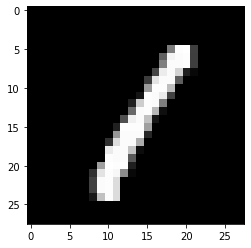

In [5]:
image_index = 3 ## Change me to view different images

print("Label: ", y_train[image_index])
reshaped_image = X_train[image_index].reshape((28, 28))

plt.imshow(reshaped_image, cmap='gray')
plt.show()

## Question 2 - Training the Model
Now that we have formatted our data, we can fit a model using sklearn's `RandomForestClassifier` class with 20 estimators and its random_state is set to 42. We'll write a function that will take as input the image and label variables that we created previously, and return a trained model.

_**Function Specifications:**_
* Should take two numpy `arrays` as input in the form `(X_train, y_train)`.
* Should return an sklearn `RandomForestClassifier` model which has a random state of 42 and number of estimators 20.
* The returned model should be fitted to the data.

In [ ]:
### START FUNCTION
def train_model(X_train, y_train):
    #your code here
    return 

### END FUNCTION

In [ ]:
clf = train_model(X_train, y_train)

## Question 3 - Testing the model
Now that you have trained your model, lets see how well it does on the test set. Write a function which returns the accuracy of your trained model when tested with the test set.

_**Function Specifications:**_
* Should take the fitted model and two numpy `arrays` `X_test, y_test` as input.
* Should return a `float` of the accuracy of the model. This number should be between zero and one.

In [ ]:
### START FUNCTION
def calculate_accuracy(clf, X_test, y_test):
    #your code here
    return 

### END FUNCTION

In [ ]:
print(calculate_accuracy(clf,X_test,y_test))

Classification reports gives us more information on where our model is going wrong - looking specifically at the performance caused by Type I & II errors. Write a function which returns the classification report of your test set.

_**Function Specifications:**_
* Should take the fitted model and two numpy `arrays` `X_test, y_test` as input.
* Should return a classification report

_**Hint**_ You don't need to do this manually, sklearn has a classification report function.

In [ ]:
### START FUNCTION
def get_class_report(clf, X_test, y_test):
    #your code here
    return

### END FUNCTION

In [ ]:
print(get_class_report(clf,X_test,y_test))

## Plotting the results

Lets actually see if your model has trained correctly. Lets plot some of the images with their predicted labels. Since we don't have the predictions stored in our notebooks memory, we need to call the predict function here first.

In [ ]:
preds = clf.predict(X_test)

image_index = 1 ## Change me to see other predictions

print("Predicted Label: ",preds[image_index])
plt.imshow(X_test[image_index].reshape((28, 28)), cmap='gray')
plt.show()

Nice work! Since we didn't use all the data in the beginning, there is a chance our performance can improve. Go change the amount of data we use to see how it affects the accuracy of your model.